In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

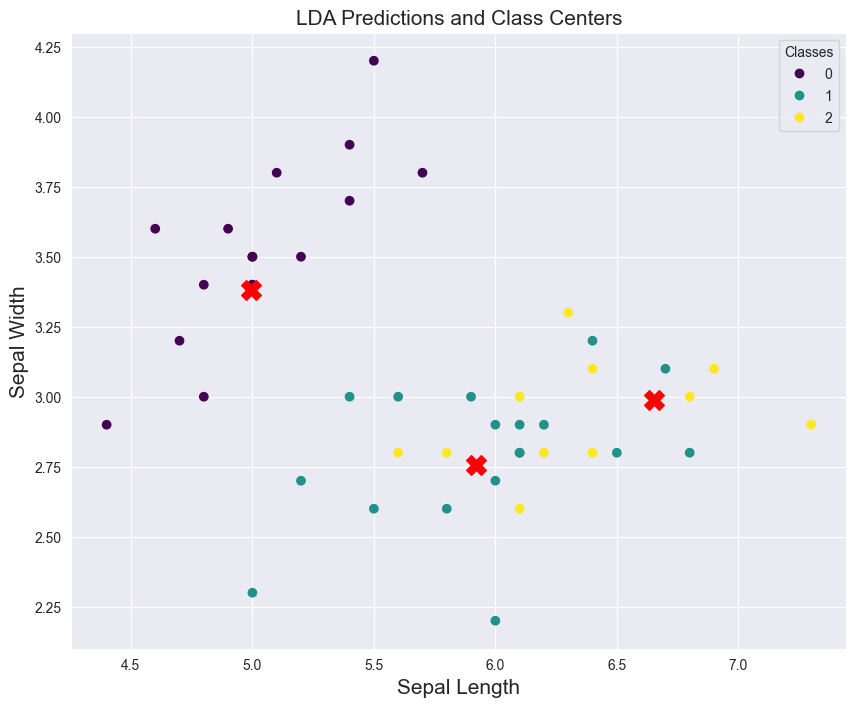

In [6]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis")
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='red', s=200, marker='X')
plt.xlabel('Sepal Length', fontsize=15)
plt.ylabel('Sepal Width', fontsize=15)
legend1 = plt.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
plt.title('LDA Predictions and Class Centers', fontsize=15)
plt.show()

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA model: {accuracy}')

Accuracy of LDA model: 0.8


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
silhouette_scores = []
range_n_clusters = list(range(2, 10))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

/Users/nikitashirmanov/Documents/Study/MIPT/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikitashirmanov/Documents/Study/MIPT/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikitashirmanov/Documents/Study/MIPT/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nikitashirmanov/Documents/Study/MIPT/venv/lib/python3.8/site-packa

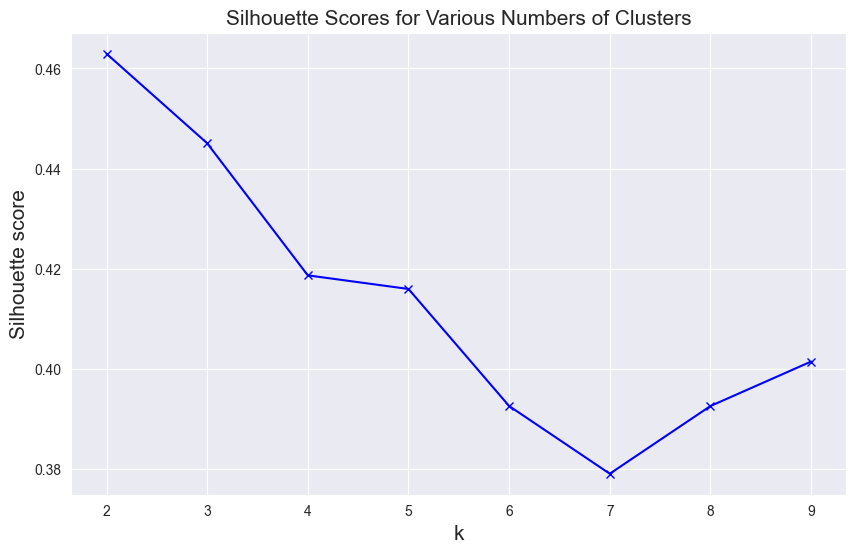

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('k', fontsize=15)
plt.ylabel('Silhouette score', fontsize=15)
plt.title('Silhouette Scores for Various Numbers of Clusters', fontsize=15)
plt.show()

In [10]:
optimal_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print("Optimal number of clusters:", optimal_clusters)

Optimal number of clusters: 2


In [11]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=10)
clusters = kmeans.fit_predict(X)

/Users/nikitashirmanov/Documents/Study/MIPT/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


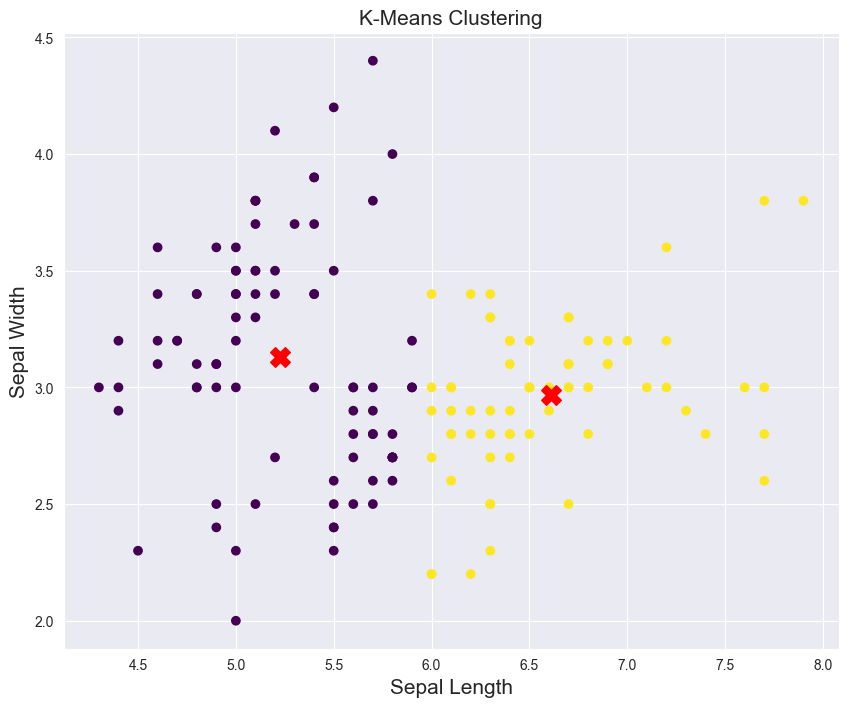

In [12]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.xlabel('Sepal Length', fontsize=15)
plt.ylabel('Sepal Width', fontsize=15)
plt.title('K-Means Clustering', fontsize=15)
plt.show()